In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('nba_2022-23_stats.csv')

print(df.head())
print(df.dtypes)
print(df.describe())

   Unnamed: 0        Player Name    Salary Position  Age     Team  GP  GS  \
0           0      Stephen Curry  48070014       PG   34      GSW  56  56   
1           1          John Wall  47345760       PG   32      LAC  34   3   
2           2  Russell Westbrook  47080179       PG   34  LAL/LAC  73  24   
3           3       LeBron James  44474988       PF   38      LAL  55  54   
4           4       Kevin Durant  44119845       PF   34  BRK/PHO  47  47   

     MP    FG  ...  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP  
0  34.7  10.0  ...  12.5  31.0  5.8  2.0  7.8  0.192   7.5   0.1  7.5   4.7  
1  22.2   4.1  ...  17.1  27.0 -0.4  0.7  0.3  0.020  -0.8  -0.4 -1.2   0.1  
2  29.1   5.9  ...  18.4  27.7 -0.6  2.6  1.9  0.044   0.3  -0.1  0.2   1.2  
3  35.5  11.1  ...  11.6  33.3  3.2  2.4  5.6  0.138   5.5   0.6  6.1   4.0  
4  35.6  10.3  ...  13.4  30.7  4.7  2.1  6.8  0.194   6.0   1.2  7.1   3.9  

[5 rows x 52 columns]
Unnamed: 0         int64
Player Name       obj

Data Cleaning

In [70]:
dfCleaned = df.copy()

From the overview of the dataset we can see 3P is an object type when we expect it to be a float64. Since there is only one row where this seems to be the case we calculate it manually by multiplying 3P% by 3PA.

In [71]:
errorCount = pd.to_numeric(dfCleaned['3P'], errors='coerce').isna().sum() - dfCleaned['3P'].isna().sum()

print(f"Number of weird values in 3P: {errorCount}")

# Find the row with weird 3P value
errorIndex = pd.to_numeric(dfCleaned['3P'], errors='coerce').isna() & dfCleaned['3P'].notna()
idx = errorIndex[errorIndex].index[0]

#Calculate 3P = 3P% * 3PA
threePointAttempt = dfCleaned.loc[idx, '3PA']
threePointPercent = dfCleaned.loc[idx, '3P%']

dfCleaned.loc[idx, '3P'] = threePointPercent * threePointAttempt

print(f"Player: {dfCleaned.loc[idx, 'Player Name']}")
print(f"3PA: {threePointAttempt}, 3P%: {threePointPercent}")
print(f"Calculated 3P: {dfCleaned.loc[idx, '3P']}")

#Convert column to numeric
dfCleaned['3P'] = pd.to_numeric(dfCleaned['3P'], errors='coerce')

Number of weird values in 3P: 1
Player: Bradley Beal
3PA: 4.4, 3P%: 0.365
Calculated 3P: 1.606


We find some missing values. Upon closer investigation these missing values were filled in as 0% since they are percentage based and their values would be calculated to 0 in any case.

In [72]:
#Missing Values
missingCount = dfCleaned.isnull().sum()
missingPercent = (missingCount/len(dfCleaned))*100
missingDf = pd.DataFrame({
    'Missing Count': missingData,
    'Percentage': missingPercent
})
missingDf = missingDf[missingDf['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missingDf)

missingCols = ['FT%', '3P%', '2P%', 'FG%', 'eFG%', 'TS%', '3PAr', 'FTr']

for col in missingCols:
    dfCleaned[col] = dfCleaned[col].fillna(0)

      Missing Count  Percentage
FT%              23    4.925054
3P%              13    2.783726
2P%               4    0.856531
FG%               1    0.214133
eFG%              1    0.214133
TS%               1    0.214133
3PAr              1    0.214133
FTr               1    0.214133


Check for % values outside of [0,1] range. The output given is to be expected as these columns can succeed 1.0

In [73]:
percentageCols = ['FG%', '3P%', '2P%', 'eFG%', 'FT%', 'ORB%', 'DRB%', 'TRB%', 
                    'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'TS%', '3PAr', 'FTr']

percentageIssues = {}
for col in percentageCols:
    if col in df.columns:
        mask = (df[col] < 0) | (df[col] > 1)
        if mask.any():
            percentageIssues[col] = df[mask].index.tolist()

if percentageIssues:
    print("\nPercentage values outside [0, 1] range:")
    for col, indices in percentageIssues.items():
        print(f"  {col}: rows {indices}")
        print(f"    Values: {df.loc[indices, col].tolist()}")


Percentage values outside [0, 1] range:
  ORB%: rows [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 21

Additional Checks

In [74]:
#Check for duplicates
print(dfCleaned.duplicated().sum())

#Check for negatives where we dont expect it
nonNegCols = ['GP', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA',
                  'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

negativeCounts = {}
for col in nonNegCols:
    if col in dfCleaned.columns:
        negMask = dfCleaned[col] < 0
        if negMask.any():
            negativeCounts[col] = dfCleaned[negMask].index.tolist()

print(len(negativeCounts))

#Unexpected ranges
percentageCols = ['FG%', '3P%', '2P%', 'eFG%', 'FT%']

percentageIssues = {}
for col in percentageCols:
    if col in df.columns:
        mask = (df[col] < 0) | (df[col] > 1)
        if mask.any():
            percentageIssues[col] = df[mask].index.tolist()

if percentageIssues:
    print("\nPercentage values outside [0, 1] range:")
    for col, indices in percentageIssues.items():
        print(f"  {col}: rows {indices}")
        print(f"    Values: {df.loc[indices, col].tolist()}")


0
0


Frequency Distribution of Numeric Columns

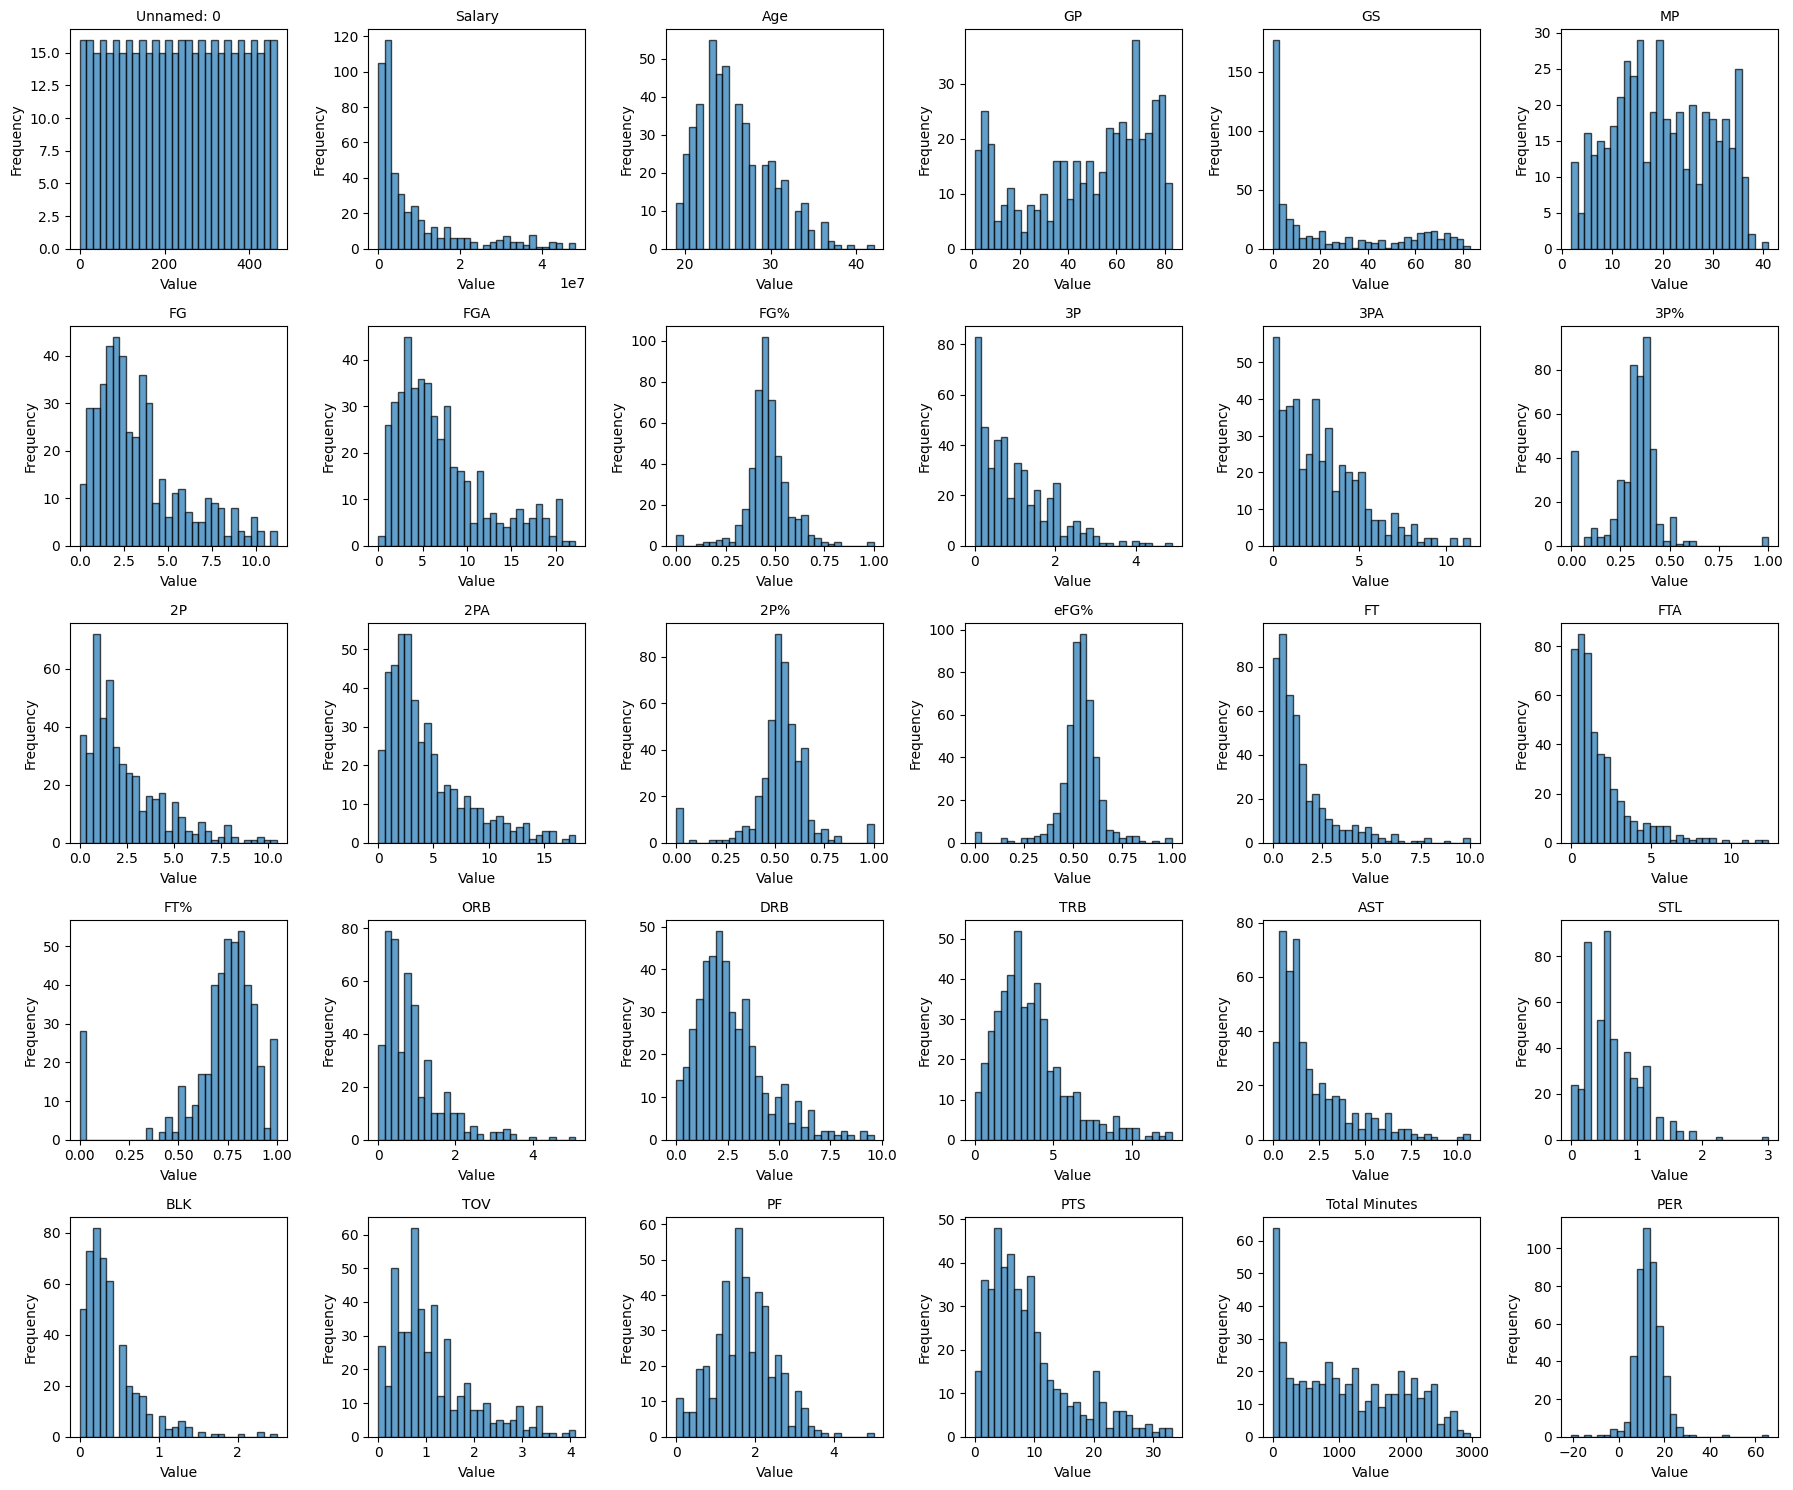

In [ ]:
numericCols = dfCleaned.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(5, 6, figsize=(18, 15))
axes = axes.flatten()

for idx, col in enumerate(numericCols[:30]):  # Show first 30 numeric columns
    axes[idx].hist(dfCleaned[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()